In [108]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df_income_train = pd.read_csv('assets/cleaned/data_train.csv')
df_income_test = pd.read_csv('assets/cleaned/data_test.csv')

In [110]:
df_income_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [111]:
df_income_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,2,7,0,9,3,1,0,0,0,40,0,0
1,38,2,89814,1,9,1,8,1,0,0,0,0,50,0,0
2,28,4,336951,6,12,1,12,1,0,0,0,0,40,0,1
3,44,2,160323,5,10,1,9,1,1,0,7688,0,40,0,1
4,18,5,103497,5,10,0,11,3,0,1,0,0,30,0,0


## RandomForest Classifier

## Model Evaluation - Metrics/Overfitting/Splitting/CV/KFold/Hyperparameter Tuning

In [112]:
df_income = df_income_train.merge(df_income_test, how='outer')

In [113]:
df_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [114]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48819 entries, 0 to 48818
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48819 non-null  int64
 1   workclass       48819 non-null  int64
 2   fnlwgt          48819 non-null  int64
 3   education       48819 non-null  int64
 4   education-num   48819 non-null  int64
 5   marital-status  48819 non-null  int64
 6   occupation      48819 non-null  int64
 7   relationship    48819 non-null  int64
 8   race            48819 non-null  int64
 9   sex             48819 non-null  int64
 10  capital-gain    48819 non-null  int64
 11  capital-loss    48819 non-null  int64
 12  hours-per-week  48819 non-null  int64
 13  native-country  48819 non-null  int64
 14  income          48819 non-null  int64
dtypes: int64(15)
memory usage: 6.0 MB


## Random_State Spliting

In [115]:
X = df_income.drop(columns=['income'])
y = df_income['income']

In [116]:
for random_state in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=random_state, test_size=0.3)
    classifier = RandomForestClassifier(random_state=1)
    classifier.fit(X_train, y_train)
    score=classifier.score(X_test, y_test)
    print("Evaluating the model on the testing set yields an accuracy of {:.2f}% with random state {}".format(score*100, random_state))

Evaluating the model on the testing set yields an accuracy of 85.76% with random state 0
Evaluating the model on the testing set yields an accuracy of 85.71% with random state 1
Evaluating the model on the testing set yields an accuracy of 85.99% with random state 2
Evaluating the model on the testing set yields an accuracy of 85.73% with random state 3


## Cross-Validation

In [120]:
classifier = RandomForestClassifier(random_state=2)
for k in range(5,10):
    scores = cross_val_score(classifier, X, y, cv=k) # cv is the number of folds (k)
    print(scores)

# It is always a good practice to show the mean AND the standard deviation of the model accuracy
    print("Accuracy: {:.2f}% (+/- {:.2f})".format(scores.mean() * 100, scores.std() * 100))

[0.8557968  0.85426055 0.86050799 0.85446538 0.85178736]
Accuracy: 85.54% (+/- 0.29)
[0.8553521  0.8552292  0.8606366  0.85926745 0.85336775 0.85435103]
Accuracy: 85.64% (+/- 0.26)
[0.85275986 0.85488959 0.86062518 0.86277603 0.85531976 0.85632349
 0.8561801 ]
Accuracy: 85.70% (+/- 0.32)
[0.85023759 0.85744716 0.86088809 0.86020977 0.8633235  0.8497214
 0.85889872 0.8531629 ]
Accuracy: 85.67% (+/- 0.48)
[0.85105991 0.8556682  0.85917051 0.85840708 0.86264749 0.85969764
 0.85029499 0.85435103 0.85490413]
Accuracy: 85.62% (+/- 0.39)


## Grid Search CV

In [124]:
#GridSearchCV
def searching_best_features(X_train: pd.DataFrame, y_train: pd.DataFrame): 
    param_grid = { 
        'n_estimators': [100,800],
        'criterion': ['gini', 'entropy'],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    classifier_cv = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy',cv= 7, verbose=0, n_jobs=-1)
    return classifier_cv.fit(X_train, y_train)

result = searching_best_features(X_train, y_train)
random_forest = result.best_estimator_
score = random_forest.score(X_test, y_test)
print("The best parameters are :", result.best_params_)
print("The best accuracy is {:.2f}%:".format(result.best_score_ * 100))
print("The generalization accuracy of the model is {:.2f}%".format(score * 100))

The best parameters are : {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 800}
The best accuracy is 85.86%:
The generalization accuracy of the model is 85.70%


## Results

[[10460   755]
 [ 1297  2134]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11215
           1       0.74      0.62      0.68      3431

    accuracy                           0.86     14646
   macro avg       0.81      0.78      0.79     14646
weighted avg       0.85      0.86      0.86     14646



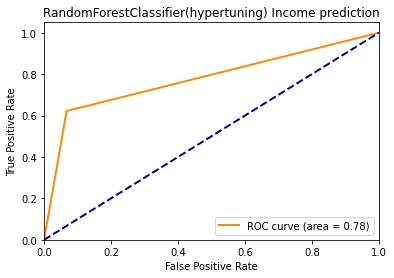

ROC-AUC Score:  0.7773277737156421


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2, test_size=0.3)
classifier = RandomForestClassifier(criterion='gini', max_features='auto', n_estimators=800).fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot ROC curve and ROC area and AUC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier(hypertuning) Income prediction')
plt.legend(loc="lower right")
plt.show()

print("ROC-AUC Score: ", roc_auc_score(y_test, y_pred))

In [132]:
score = classifier.score(X_train, y_train)
print("Evaluating the model on the training set yields an accuracy of {}%".format(score*100))
score=classifier.score(X_test, y_test)
print("Evaluating the model on the testing set yields an accuracy of {:.2f}%".format(score*100))

Evaluating the model on the training set yields an accuracy of 99.99707371316536%
Evaluating the model on the testing set yields an accuracy of 85.99%
